<a href="https://colab.research.google.com/github/matule00/NAEX/blob/main/prace_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [4]:
SVR = pd.read_csv('SVR_peak.csv')
SVR['Time'] = pd.to_datetime(SVR['Time'])

SVR = SVR.iloc[:-20]
#SVR = SVR[(SVR['prev_extrema_value'] <500) & (SVR['next_extrema_value'] <500)]


valid_rows = SVR.dropna(subset=['time_prev', 'amp_diff', 'prev_extrema_value'])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2218.5569 - mae: 24.9549 - val_loss: 2399.9719 - val_mae: 24.3538
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1922.1571 - mae: 22.0657 - val_loss: 1583.8206 - val_mae: 19.4058
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1119.9542 - mae: 16.0208 - val_loss: 682.4152 - val_mae: 12.0022
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 483.3321 - mae: 10.5020 - val_loss: 485.4671 - val_mae: 10.2798
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 484.9379 - mae: 9.9339 - val_loss: 426.5285 - val_mae: 9.4951
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 429.6117 - mae: 9.3750 - val_loss: 409.7456 - val_mae: 9.3377
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 361.9500 - mae: 8.8233 - val_loss: 400.1887 - val_mae: 9.3416
Epoch 8/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 344.2880 - mae: 8.8463 - val_loss: 393.5818 - val_mae: 9.2110
Epoch 9/100
129

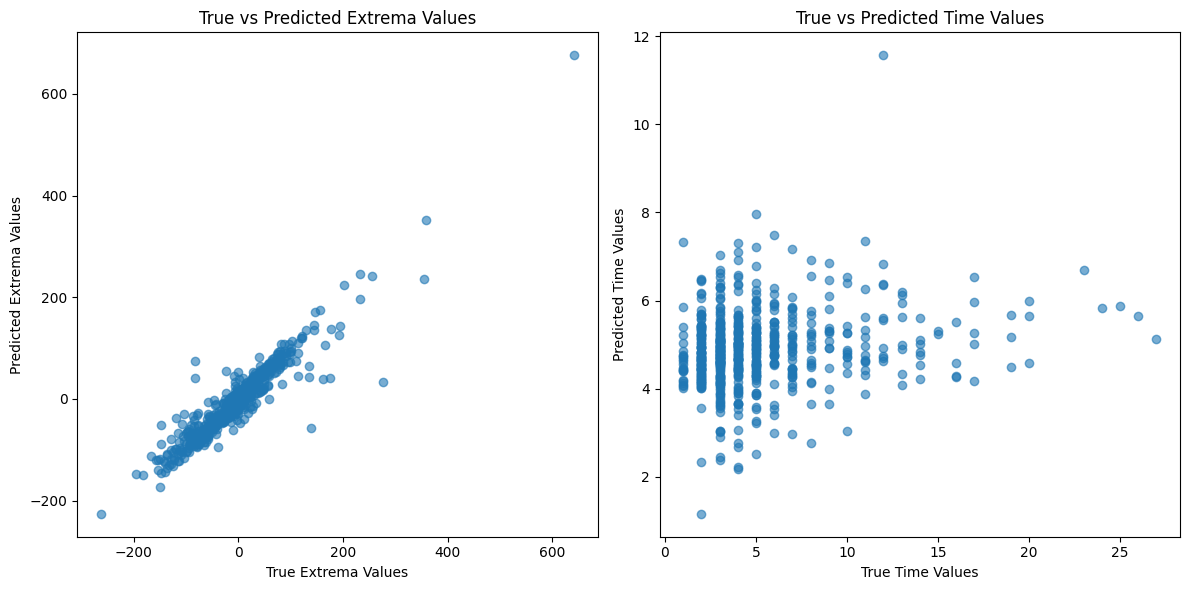

In [7]:
X = valid_rows[['time_prev', 'amp_diff', 'prev_extrema_value']].values
y = valid_rows[['next_extrema_value', 'time_next']].values  # Two outputs: extrema and time

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model with two outputs
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(2)  # Output layer with 2 neurons: one for next_extrema_value and one for time_next
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {test_mae}")

# Predict and visualize both outputs
y_pred = model.predict(X_test)

# Separate predictions for both outputs
y_pred_extrema = y_pred[:, 0]  # Predictions for the extrema value
y_pred_time = y_pred[:, 1]     # Predictions for the time

# Separate true values for both outputs
y_test_extrema = y_test[:, 0]
y_test_time = y_test[:, 1]

# Calculate Mean Squared Error for both outputs
mse_extrema = mean_squared_error(y_test_extrema, y_pred_extrema)
mse_time = mean_squared_error(y_test_time, y_pred_time)

print(f"Mean Squared Error for Extrema: {mse_extrema}")
print(f"Mean Squared Error for Time: {mse_time}")

# Visualize True vs Predicted for Extrema Value
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_extrema, y_pred_extrema, alpha=0.6)
plt.xlabel('True Extrema Values')
plt.ylabel('Predicted Extrema Values')
plt.title('True vs Predicted Extrema Values')

# Visualize True vs Predicted for Time
plt.subplot(1, 2, 2)
plt.scatter(y_test_time, y_pred_time, alpha=0.6)
plt.xlabel('True Time Values')
plt.ylabel('Predicted Time Values')
plt.title('True vs Predicted Time Values')

plt.tight_layout()
plt.show()